# **VoxelCity Demo**

You can easily learn how the Python module "VoxelCity" works by following this demo.

Please execute cells from Step 1 to Step 5 by clicking the ▶️ icons.

It is important to note that you need to choose either Option 1 or Option 2 in Step 2 and execute only one.

Also, you need to set up your Earth Engine enabled Cloud Project to use VoxelCity. The instructions on how to set it up are detailed here: https://developers.google.com/earth-engine/cloud/earthengine_cloud_project_setup

# Step1. Prepare environment

In [25]:
#@title Install VoxelCity
# !pip install voxelcity

In [ ]:
#@title Authenticate Google Earth Engine on local environment
!earthengine authenticate

import ee
ee.Authenticate()
ee.Initialize(project='ee-kunihiko92150920research')

Authenticate: Credentials already exist.  Use --force to refresh.


# Step2. Set target area by a rectangle

In [42]:
#@title Set target city (you need to fill in required values before executing!)
cityname = "tokyo" #@param {type:"string"}

## Option1 Draw a rectangle directly

In [9]:
#@title Draw a rectangle on a map (Click ■ on the left side, then click the north west corner and the south east corner of the rectangle.)
from voxelcity.geo.draw import draw_rectangle_map_cityname

m, rectangle_vertices = draw_rectangle_map_cityname(cityname, zoom=15)
m

Map(center=[52.3730796, 4.8924534], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

Vertices of the drawn rectangle:
Longitude: 4.887843, Latitude: 52.370516
Longitude: 4.887843, Latitude: 52.375992
Longitude: 4.897156, Latitude: 52.375992
Longitude: 4.897156, Latitude: 52.370516


##Option2 Set the center location and the width [m] (east-west) and height [m] (nort-south)

In [43]:
#@title Set width (m) and height (m) (you need to fill in required values before executing!)
width = 500 #@param {type:"number"}
height = 500 #@param {type:"number"}

In [44]:
#@title Draw a center point (circlemarker) on a map (Click ○ on the left side and then click the center location on the map.)
from voxelcity.geo.draw import center_location_map_cityname

m, rectangle_vertices = center_location_map_cityname(cityname, width, height, zoom=15)
m

Map(center=[35.6768601, 139.7638947], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Point drawn at Latitude: 35.673544, Longitude: 139.759183
Rectangle vertices:
Latitude: 35.671290792464255, Longitude: 139.7564216011559
Latitude: 35.67579720669077, Longitude: 139.7564216011559
Latitude: 35.67579720669077, Longitude: 139.76194439884412
Latitude: 35.671290792464255, Longitude: 139.76194439884412


In [36]:
#eubucco.py
rectangle_vertices = [(49.60903223400548, 6.1256568534699705),
 (49.61352776511707, 6.1256568534699705),
 (49.61352776511707, 6.132575146530029),
 (49.60903223400548, 6.132575146530029)]

In [46]:
#oemj.py
rectangle_vertices = [(35.671290792464255, 139.7564216011559),
 (35.67579720669077, 139.7564216011559),
 (35.67579720669077, 139.76194439884412),
 (35.671290792464255, 139.76194439884412)]

In [2]:
#mbfp.py, overture.py, osm.py, urbanwatch.py, gee.py, omt.py
rectangle_vertices = [(47.59830044521263, -122.33587348582083),
 (47.60279755390168, -122.33587348582083),
 (47.60279755390168, -122.32922451417917),
 (47.59830044521263, -122.32922451417917)]

In [45]:
rectangle_vertices

[(35.671290792464255, 139.7564216011559),
 (35.67579720669077, 139.7564216011559),
 (35.67579720669077, 139.76194439884412),
 (35.671290792464255, 139.76194439884412)]

# Step3 Set variables

In [37]:
#@title Set necessary parameters, data sources and meshsize (m)
building_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Overture', 'EUBUCCO v0.1', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'OpenMapTiles', 'Local file']
building_complementary_source = 'None' #@param ['None', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'OpenMapTiles', 'Local file', 'OpenStreetMap', 'Overture', 'EUBUCCO v0.1']
land_cover_source = 'OpenStreetMap' #@param ['Urbanwatch', 'OpenEarthMapJapan', 'ESA WorldCover', 'ESRI 10m Annual Land Cover', 'Dynamic World V1', 'OpenStreetMap']
canopy_height_source = 'High Resolution 1m Global Canopy Height Maps' #@param ['High Resolution 1m Global Canopy Height Maps', 'ETH Global Sentinel-2 10m Canopy Height (2020)']
dem_source = 'DeltaDTM' #@param ['DeltaDTM', 'FABDEM', 'England 1m DTM', 'DEM France 1m', 'AUSTRALIA 5M DEM', 'USGS 3DEP 1m', 'NASA', 'COPERNICUS', 'Flat']
meshsize = 5 #@param {type:"number"}

In [ ]:
#@title Set optional parameters, data sources and meshsize (m)
kwargs = {
    # "building_path": 'path_to_building_source_file', #To set path to building base data source when you select 'Local file' as building_source.  
    # "building_complementary_path": 'path_to_building_complemntary_source_file', #To set path to building complementary data source  when you select 'Local file' as building_complementary_source.
    # "building_complementary_source": building_complementary_source,
    # "complement_polygon": True, #Set 'True' if you want to incorporate building footprints from building complementary source. Only building footprints that do not have any intersections with footprints from building source are included.
    "output_dir": 'output/test', #To set directory path for output files 
    # "remove_perimeter_object": 0.1, #Set value more than 0 if you want to remove objects including buildings and trees near to domain boundarys (perimeter). Used mainly for CFD simulation. For instance, when you set 0.1, objects with distances from domain boundaries less than 0.1 * domain width (height) are removed.
    # "gridvis": True, #Set 'True' if you want to visualize extracted 2D grid data.
    # "mapvis": False, #Set 'True' if you want to visualize extracted 2D grid data on a basemap. Note that it take longer time than "gridvis".
    # "voxelvis": False, #Set 'True' if you want to visualize generated voxel 3d city model. Note that this visualiztion takes long time if the number of voxels is huge, e.g., more than one million.  
    # "voxelvis_img_save_path": None, #Set path to save image file of generated voxel 3d city model.
    # "maptiler_API_key": 'your_API_key', #To set API key of Maptiler when you select 'OpenMapTilse' as building_source.
    # "trunk_height_ratio": None, #To set ratio of tree trunk height against tree canopy height. Default: 0.59 (11.76 / 19.98).
    # "min_canopy_height": None, #To set minimum canopy height in meters if you want to exclude trees lower than that height.
    "dem_interpolation": True, #Set 'True' when mesh size if finer than resolution of dem data source and if you want to use interporation.
    # "dynamic_world_date": '2021-04-02', #To set date of Dynamic World.
    # "esri_landcover_year": '2023' #To set year of Esri Land Cover.
}

# Step4 Get voxelcity output

Creating Land Use Land Cover grid
 
Data source: OpenStreetMap
Fetching data from Overpass API...
Converting data to GeoJSON format...
Adjusted mesh size: (4.999999999987944, 4.999770097530468)


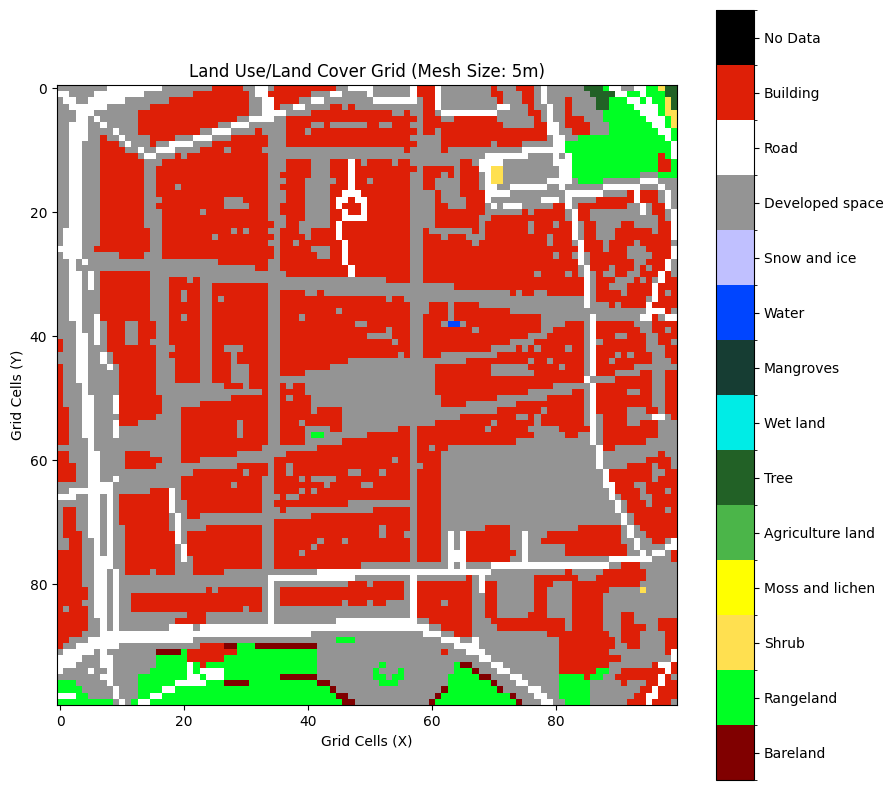

Creating Building Height grid
 
Data source: OpenStreetMap


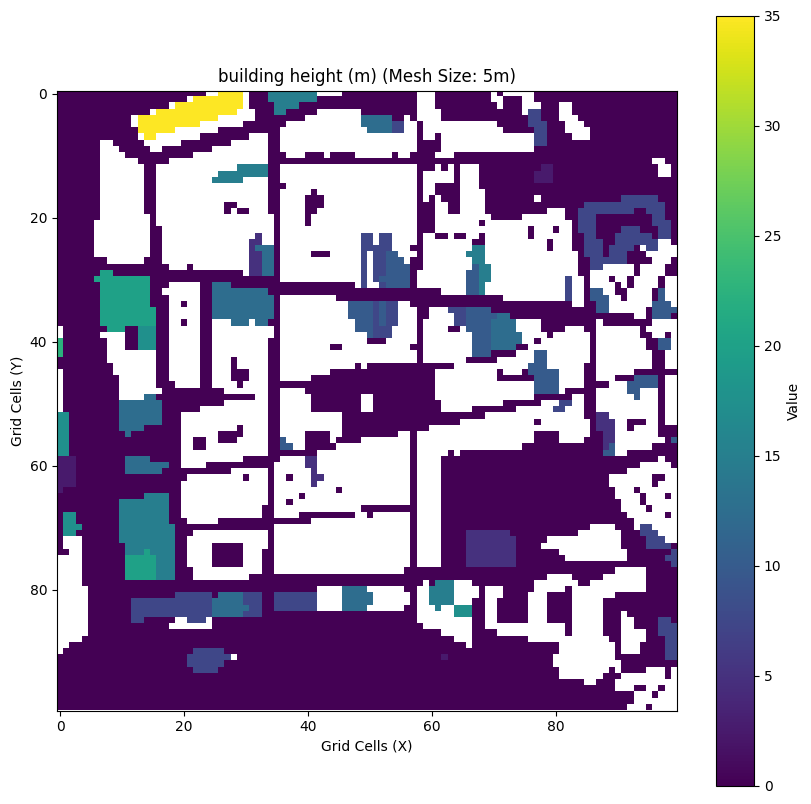

Creating Canopy Height grid
 
Data source: High Resolution Canopy Height Maps by WRI and Meta


2024-12-09 15:33:50,021 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-kunihiko92150920research/maps/4500f437a658380603b3a610b3fb755a-c6f9b3454d2debd9adf6a44ee4962c18/tiles/14/8470/5584 "HTTP/1.1 200 OK"
2024-12-09 15:33:50,041 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-kunihiko92150920research/maps/4500f437a658380603b3a610b3fb755a-c6f9b3454d2debd9adf6a44ee4962c18/tiles/14/8470/5583 "HTTP/1.1 200 OK"
2024-12-09 15:33:50,044 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-kunihiko92150920research/maps/4500f437a658380603b3a610b3fb755a-c6f9b3454d2debd9adf6a44ee4962c18/tiles/14/8471/5584 "HTTP/1.1 200 OK"


Downloaded image 1/4
Downloaded image 2/4


2024-12-09 15:33:51,037 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-kunihiko92150920research/maps/4500f437a658380603b3a610b3fb755a-c6f9b3454d2debd9adf6a44ee4962c18/tiles/14/8471/5583 "HTTP/1.1 200 OK"
2024-12-09 15:33:51,127 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Users\kunih\anaconda3\envs\voxelcity\Library\share\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
2024-12-09 15:33:51,127 - WARNING - CPLE_AppDefined in The definition of projected CRS EPSG:3857 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
2024-12-09 15:33:51,158 - INFO - GDAL signalled an error: err_no=1, msg=

Downloaded image 3/4
Downloaded image 4/4
Saving GeoTIFF. Please wait...
Image saved to output/test\canopy_height.tif


Writing output to: c:\Users\kunih\OneDrive\00_Codes\python\voxelcity_demo\output\test\canopy_height.tif
2024-12-09 15:33:51,340 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Users\kunih\anaconda3\envs\voxelcity\Library\share\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
2024-12-09 15:33:51,348 - WARNING - CPLE_AppDefined in The definition of projected CRS EPSG:3857 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
2024-12-09 15:33:51,348 - INFO - GDAL signalled an error: err_no=1, msg='Deleting c:\\Users\\kunih\\OneDrive\\00_Codes\\python\\voxelcity_demo\\output\\test\\canopy_height.tif failed:\nPermission denied

681905.0017026037 6378840.415867058 682675.1425632078 6379612.74483452


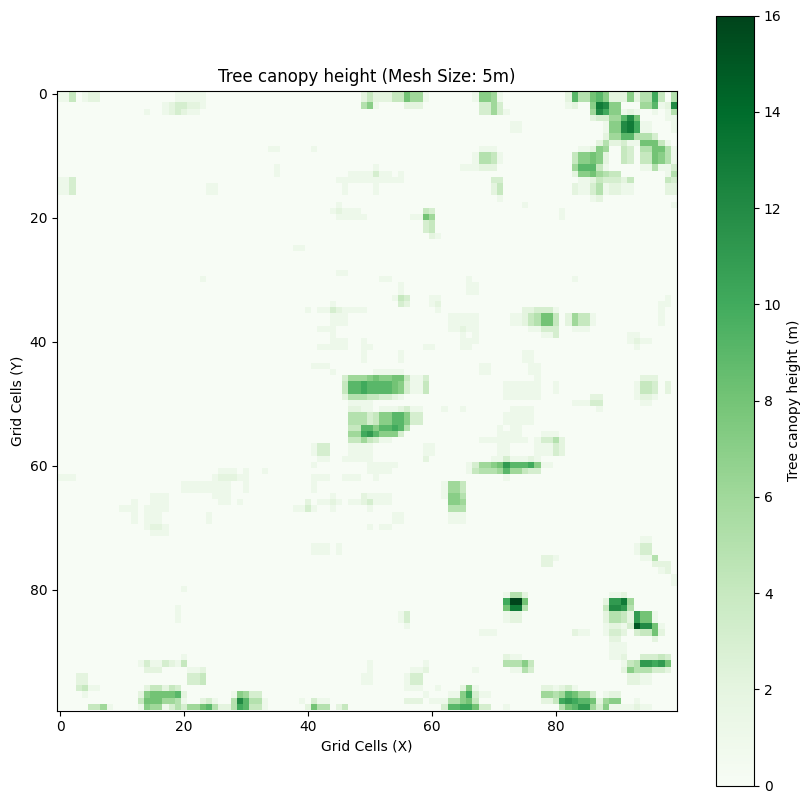

Creating Digital Elevation Model (DEM) grid
 
Data source: DeltaDTM
Generating URL ...
Please wait ...


2024-12-09 15:33:53,973 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Users\kunih\anaconda3\envs\voxelcity\Library\share\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
2024-12-09 15:33:53,990 - INFO - GDAL signalled an error: err_no=1, msg='PROJ: proj_identify: C:\\Users\\kunih\\anaconda3\\envs\\voxelcity\\Library\\share\\proj\\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.'


Data downloaded to c:\Users\kunih\OneDrive\00_Codes\python\voxelcity_demo\output\test\dem.tif


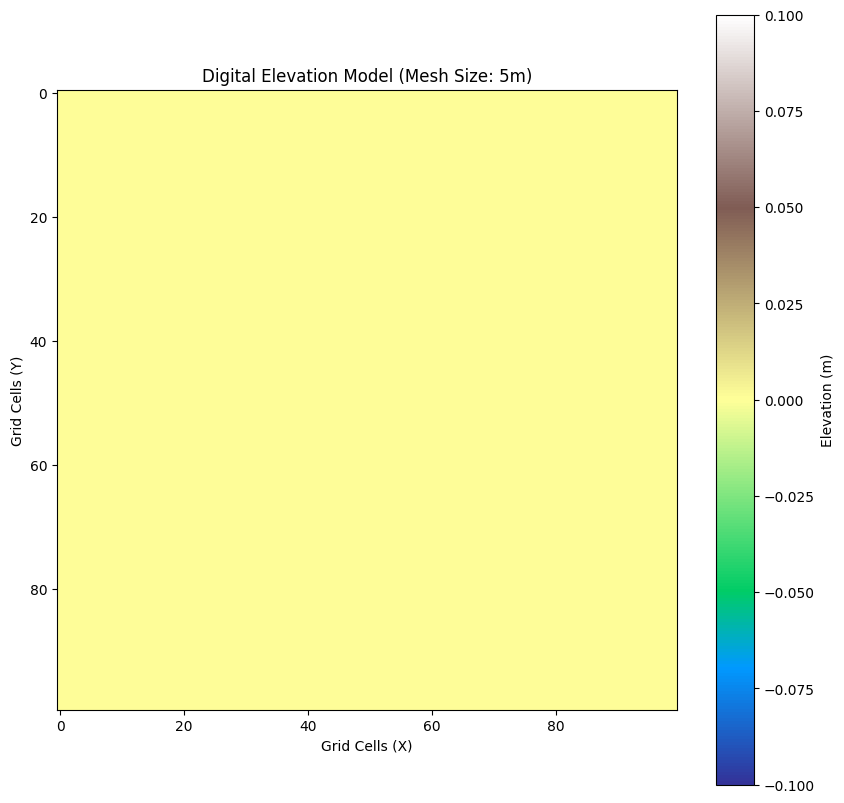

Generating 3D voxel data


In [39]:
#@title Obtain grid data integrate it to create voxel data
from voxelcity import get_voxelcity

voxelcity_grid, building_height_grid, building_min_height_grid, building_id_grid, canopy_height_grid, land_cover_grid, dem_grid, building_geojson = get_voxelcity(
    rectangle_vertices, 
    building_source, 
    land_cover_source, 
    canopy_height_source, 
    dem_source, 
    meshsize, 
    **kwargs
)

# Step5 Export files

In [ ]:
#@title Export INX file for ENVI-MET
from voxelcity.file.envimet import export_inx, generate_edb_file

envimet_kwargs = {
    "output_directory": 'output/test', # To set directory path for output files 
    "author_name": "enter your name", # Optional. To set author name in INX.
    "model_description": "generated and exported using VoxCity", # Optional. To desctibe model in INX.
    "domain_building_max_height_ratio": 2, # Optional. To set ratio between domain height (Z) and maximum height (building + terrain). Default: 2.0.
    "useTelescoping_grid": True, # Optional. To activate telescoping grid. Default: False.
    "verticalStretch": 20, # Optional. To set vertical stretch (%). Default: 0%.
    "min_grids_Z": 20, # Optional. To set minimum number of vertical grid cells (Z-axis). Default: None.
    "lad": 1.0 # Optional. To set Leaf Area Density (LAD) of trees in m^-1. Default: 1.0 m^-1.
}

export_inx(building_height_grid, building_id_grid, canopy_height_grid, land_cover_grid, dem_grid, meshsize, land_cover_source, rectangle_vertices, **envimet_kwargs)
generate_edb_file(**envimet_kwargs)

In [20]:
#@title Export vox file for MagicaVoxel
from voxelcity.file.magicavoxel import export_magicavoxel_vox

output_path = f"output/magicavoxel"
base_filename = f'test_seattle'
export_magicavoxel_vox(voxelcity_grid, output_path, base_filename=base_filename)

Chunk 0_0_0 saved as output/magicavoxel/test_seattle_0_0_0.vox
Shape: (100, 13, 100)
	vox files was successfully exported in output/magicavoxel


In [21]:
#@title Export OBJ file

from voxelcity.file.obj import export_obj

output_directory = './output/test'
output_file_name = 'voxcity_test'

export_obj(voxelcity_grid, output_directory, output_file_name, meshsize)

OBJ and MTL files have been generated in ./output/test with the base name "voxcity_test".


# Step6 Use cases

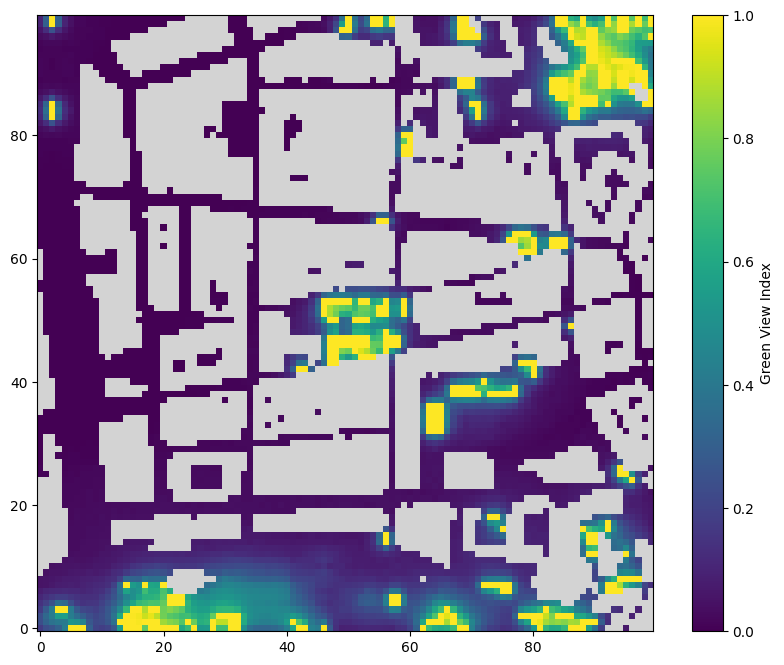

OBJ and MTL files have been generated in output/test with the base name "gvi_test".


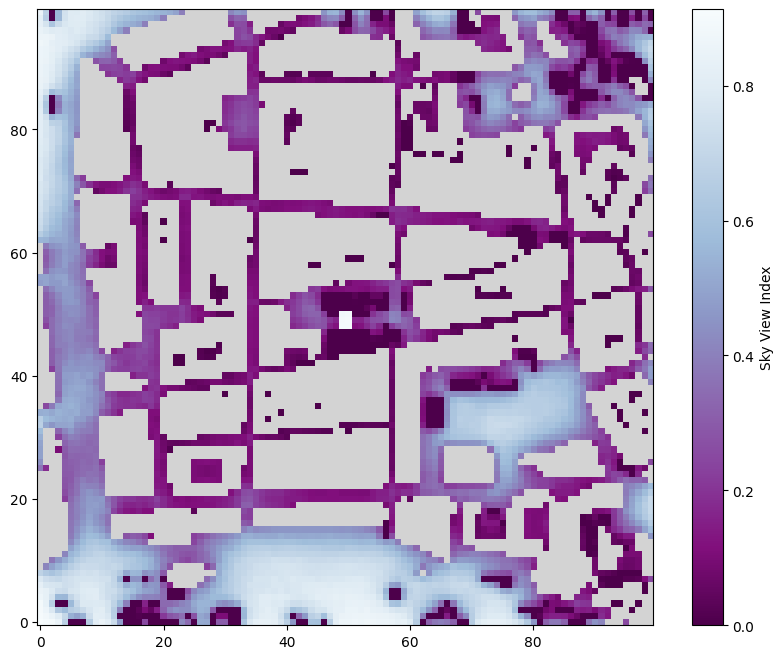

OBJ and MTL files have been generated in output/test with the base name "svi_test".


In [41]:
#@title Simulation of view index

from voxelcity.sim.view import get_green_view_index, get_sky_view_index

view_kwargs = {
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "dem_grid": dem_grid,
    "colormap": 'viridis', # Choose a colormap. Default: 'viridis'.
    "obj_export": True, # Set "True" if you export the result in an OBJ file.
    "output_directory": 'output/test', # To set directory path for output files. Default: False.
    "output_file_name": 'gvi_test', # To set file name excluding extension. Default: 'view_index.
    "num_colors": 10, # Number of discrete colors
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}
gvi_grid = get_green_view_index(voxelcity_grid, meshsize, **view_kwargs)

view_kwargs = {
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "dem_grid": dem_grid,
    "colormap": 'BuPu_r', # Choose a colormap.  Default: 'viridis'.
    "obj_export": True, # Set "True" if you export the result in an OBJ file.
    "output_directory": 'output/test', # To set directory path for output files. Default: False.
    "output_file_name": 'svi_test', # To set file name excluding extension. Default: 'view_index.
    "num_colors": 10, # Number of discrete colors in OBJ file. Default: 10.
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}
svi_grid = get_sky_view_index(voxelcity_grid, meshsize, **view_kwargs)

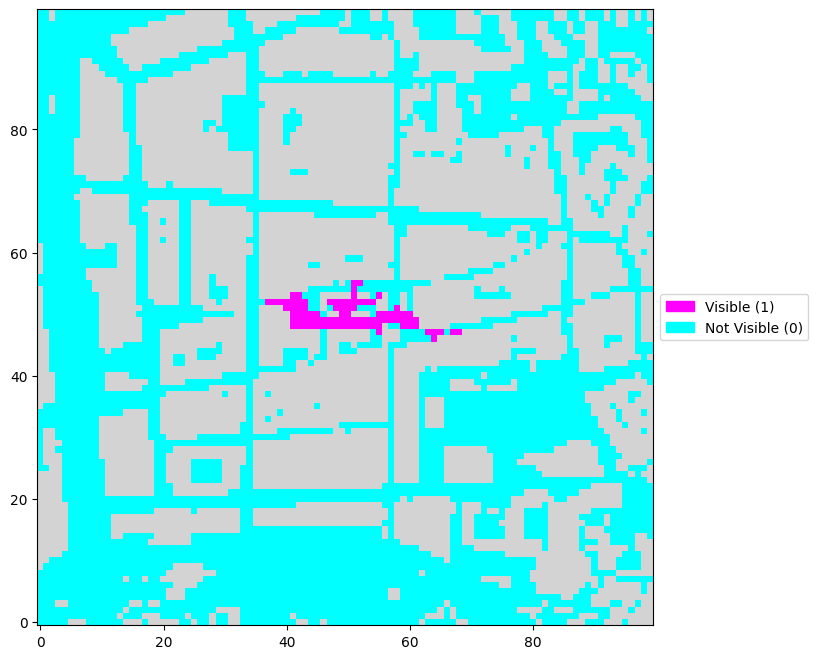

OBJ and MTL files have been generated in output/test with the base name "landmark_visibility_test".
OBJ and MTL files have been generated in output/test with the base name "voxcity_landmark_visibility_test".


In [40]:
from voxelcity.sim.view import get_landmark_visibility_map

landmark_kwargs = {
    # "landmark_building_ids": [518143060, 34619038, 303446390], # Set building ids of landmark if you want to specify. When you do not input this, building ids at the center of target area are automatically set.
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "rectangle_vertices": rectangle_vertices,
    "dem_grid": dem_grid,
    "colormap": 'cool', # Choose a colormap.  Default: 'viridis'.
    "obj_export": True, # Set "True" if you export the result in an OBJ file.
    "output_directory": 'output/test', # To set directory path for output files. Default: False.
    "output_file_name": 'landmark_visibility_test', # To set file name excluding extension. Default: 'view_index.
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}

landmark_vis_map = get_landmark_visibility_map(voxelcity_grid, building_id_grid, building_geojson, meshsize, **landmark_kwargs)

In [17]:
#@title Simulation of landmark visibility
from voxelcity.utils.visualization import display_builing_ids_on_map
display_builing_ids_on_map(building_geojson, rectangle_vertices)

# **References**

**OpenStreetMap**

Type: Building footprint

Coverage: All over the world (crowdsourced)

Link:https://wiki.openstreetmap.org/wiki/Key:building

**Microsoft Building Footprints**

Type: Building footprint

Coverage: footprint: all over the world, height: US, Europe, Australia

Link: https://github.com/microsoft/GlobalMLBuildingFootprints

**Urbanwatch**

Type: Land Use Land Cover

Resolution: 1 meter

Coverage: 22 major cities in the US including Atlanta, Boston, Charlotte, Chicago, Denver, Dallas, Detroit, Houston, Los Angeles, Miami, Minneapolis, New York City, Philadelphia, Phoenix, Raleigh, Riverside, San Diego, San Francisco, Seattle, Tampa, St. Louis, and Washington D.C.

Link: https://urbanwatch.charlotte.edu/

Citation: Zhang, Y., Chen, G., Myint, S.W., Zhou, Y., Hay, G.J., Vukomanovic, J., & Meentemeyer, R.K. (2022). UrbanWatch: A 1-meter resolution land cover and land use database for 22 major cities in the United States. Remote Sensing of Environment, 278: 113106.

**OpenEarthMap Japan**

Type: Land Use Land Cover

Resolution: <= 1 meter

Coverage: Japan

Link: https://www.open-earth-map.org/demo/Japan/leaflet.html

Citation: Yokoya, N., Xia, J., & Broni-Bediako, C. (2024). Submeter-level land cover mapping of Japan. International Journal of Applied Earth Observation and Geoinformation, 127, 103660.

**ESA World Cover**

Type: Land Use Land Cover

Resolution: 10 meters

Coverage: All over the world

Link: https://esa-worldcover.org/en

**NASA DEM**

Type: Digital Elevation Model

Resolution: <= 30 meters

Coverage: All over the world

Link: https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003

**COPERNICUS DEM**

Type: Digital Elevation Model

Resolution: <= 30 meters

Coverage: All over the world

Link: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_DEM_GLO30

**DeltaDTM**

Type: Digital Terrain Model

Resolution: <= 30 meters

Coverage: All over the world (coastral area)

Link: https://gee-community-catalog.org/projects/delta_dtm/

